In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

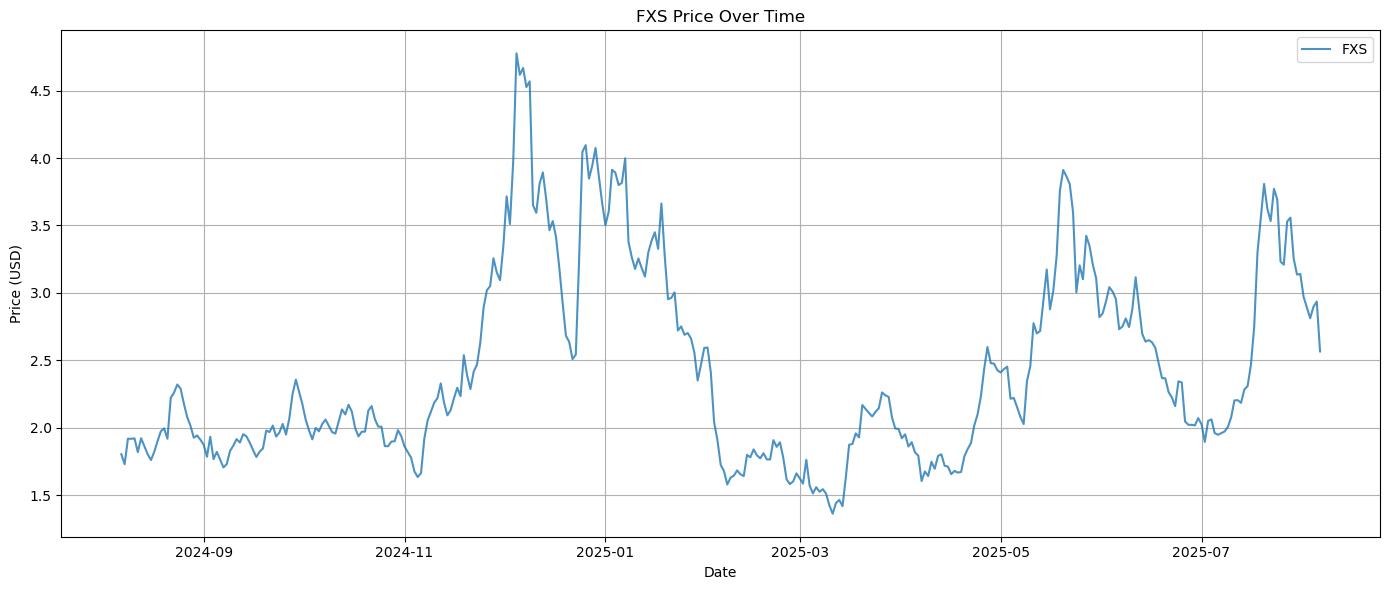

In [10]:
# Load price data
price_df = pd.read_csv("data/raw/fxs_frax_price_history.csv")
price_df["date"] = pd.to_datetime(price_df["date"])

# Load TVL data
tvl_df = pd.read_csv("data/raw/frax_tvl.csv")
tvl_df["date"] = pd.to_datetime(tvl_df["date"])

df = pd.merge(price_df, tvl_df, on="date", how="inner")
df = df.sort_values("date")
df.head()


plt.figure(figsize=(14, 6))
plt.plot(df["date"], df["frax-share_price"], label="FXS", alpha=0.8)
plt.title("FXS Price Over Time")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

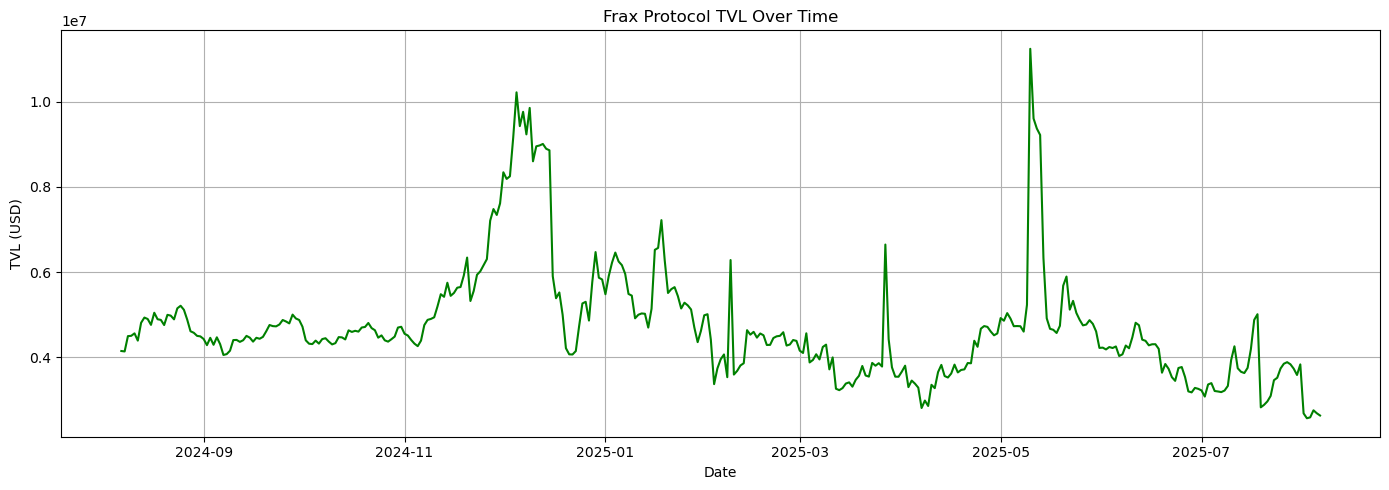

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(df["date"], df["tvl_usd"], color="green")
plt.title("Frax Protocol TVL Over Time")
plt.ylabel("TVL (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Matrix:
                  frax-share_price   tvl_usd
frax-share_price          1.000000  0.550349
tvl_usd                   0.550349  1.000000


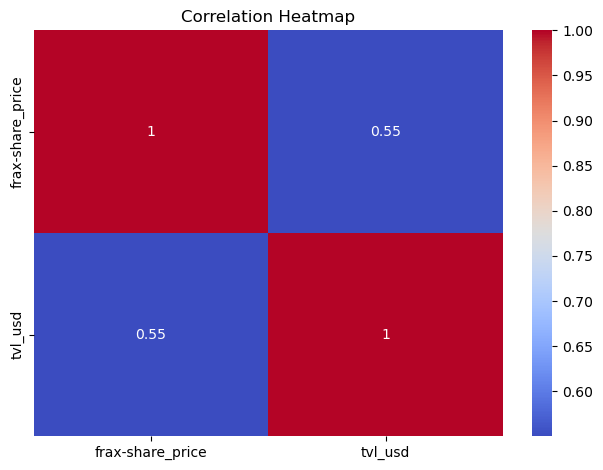

In [13]:
correlation = df[["frax-share_price", "tvl_usd"]].corr()
print("Correlation Matrix:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()